In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
basic_fns = [
    lambda x: x,
    lambda x: x**2,
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.exp(x)/100,
]

def lstsq_approx(x, y, fns):
    A = np.array([[fn(xi) for fn in fns] for xi in x])
    x = A.T @ A
    y = A.T @ y
    coeffs = np.linalg.solve(x, y)
    return coeffs

In [21]:
data = np.loadtxt('./approx_guess/func_guess_data.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]
data.shape, x, y

((500, 2),
 array([ 1.        ,  1.01803607,  1.03607214,  1.05410822,  1.07214429,
         1.09018036,  1.10821643,  1.12625251,  1.14428858,  1.16232465,
         1.18036072,  1.19839679,  1.21643287,  1.23446894,  1.25250501,
         1.27054108,  1.28857715,  1.30661323,  1.3246493 ,  1.34268537,
         1.36072144,  1.37875752,  1.39679359,  1.41482966,  1.43286573,
         1.4509018 ,  1.46893788,  1.48697395,  1.50501002,  1.52304609,
         1.54108216,  1.55911824,  1.57715431,  1.59519038,  1.61322645,
         1.63126253,  1.6492986 ,  1.66733467,  1.68537074,  1.70340681,
         1.72144289,  1.73947896,  1.75751503,  1.7755511 ,  1.79358717,
         1.81162325,  1.82965932,  1.84769539,  1.86573146,  1.88376754,
         1.90180361,  1.91983968,  1.93787575,  1.95591182,  1.9739479 ,
         1.99198397,  2.01002004,  2.02805611,  2.04609218,  2.06412826,
         2.08216433,  2.1002004 ,  2.11823647,  2.13627255,  2.15430862,
         2.17234469,  2.19038076,  2.208

In [22]:
coeffs = lstsq_approx(x, y, basic_fns)
print("Coefficients:", coeffs)

Coefficients: [ 3.03632154 -1.00599842 10.05337359 15.04934181  1.00257185]


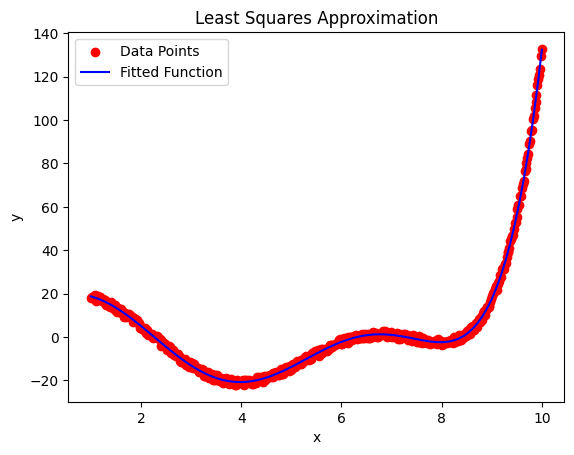

In [23]:
x_fit = np.linspace(min(x), max(x), 100)
y_fit = sum(c * fn(x_fit) for c, fn in zip(coeffs, basic_fns))

plt.scatter(x, y, label='Data Points', color='red')
plt.plot(x_fit, y_fit, label='Fitted Function', color='blue')
plt.legend()
plt.title('Least Squares Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()